### 12304510 K23FA project (CA2)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("railway.csv")
print(df)
df.head(5)
df.tail(5)
df.shape
df.describe()
df.info()



                Transaction ID Date of Purchase Time of Purchase  \
0      da8a6ba8-b3dc-4677-b176       08-12-2023         12:41:11   
1      b0cdd1b0-f214-4197-be53       16-12-2023         11:23:01   
2      f3ba7a96-f713-40d9-9629       19-12-2023         19:51:27   
3      b2471f11-4fe7-4c87-8ab4       20-12-2023         23:00:36   
4      2be00b45-0762-485e-a7a3       27-12-2023         18:22:56   
...                        ...              ...              ...   
31648  1304623d-b8b7-4999-8e9c       30-04-2024         18:42:58   
31649  7da22246-f480-417c-bc2f       30-04-2024         18:46:10   
31650  add9debf-46c1-4c75-b52d       30-04-2024         18:56:41   
31651  b92b047c-21fd-4859-966a       30-04-2024         19:51:47   
31652  1d5d89a2-bde5-410f-8f91       30-04-2024         20:05:39   

      Purchase Type Payment Method Railcard Ticket Class Ticket Type  Price  \
0            Online    Contactless    Adult     Standard     Advance     43   
1           Station    Cr

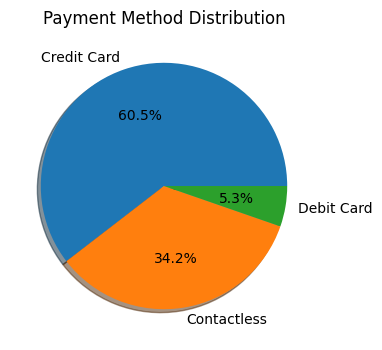

In [22]:
#count by payment method and show on pie chart
var1 = df["Payment Method"].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(var1,shadow=True, labels=var1.index, autopct="%1.1f%%")
plt.title("Payment Method Distribution") 
plt.show()



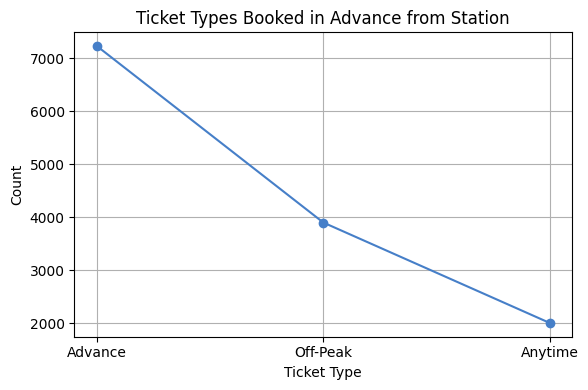

In [24]:
#find how many person purchase ticket from station and in advance with line chart


plt.figure(figsize=(6, 4))
plt.plot(var2.index, var2.values, marker='o', linestyle='-', color='#467fc8')
plt.title("Ticket Types Booked in Advance from Station")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()





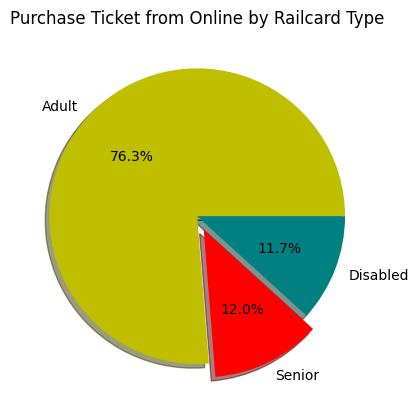

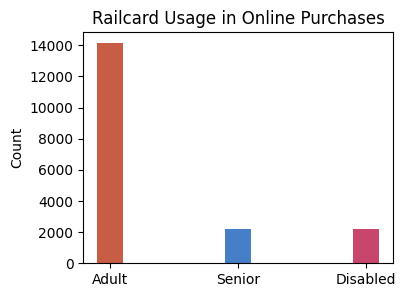

In [32]:
#find out how many peoples purchase from online (pie) and having Adult RailCard(bar)
df_online = df[df["Purchase Type"] == "Online"]
var4 = df_online["Railcard"].value_counts()

plt.pie(var4, shadow=True, labels=var4.index, autopct="%1.1f%%", 
colors=["y", "r", "teal"], explode=(0,0.1,0))
plt.title("Purchase Ticket from Online by Railcard Type") 
plt.show()

plt.figure(figsize=(4, 3))
plt.bar(var4.index, var4.values, color=["#c85d46", "#467fc8", "#c8466b"], width=0.2)
plt.title("Railcard Usage in Online Purchases")
plt.ylabel("Count")
plt.show()



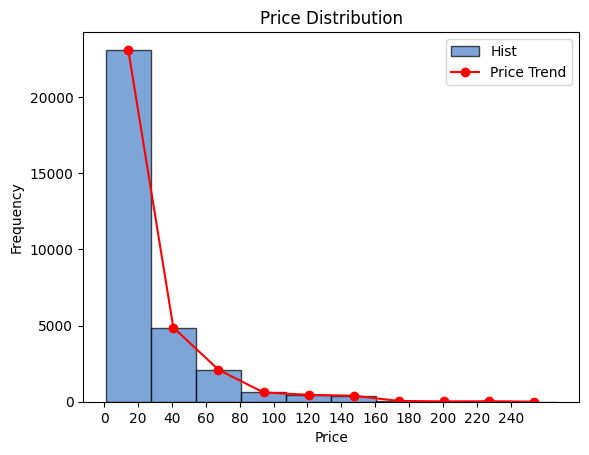

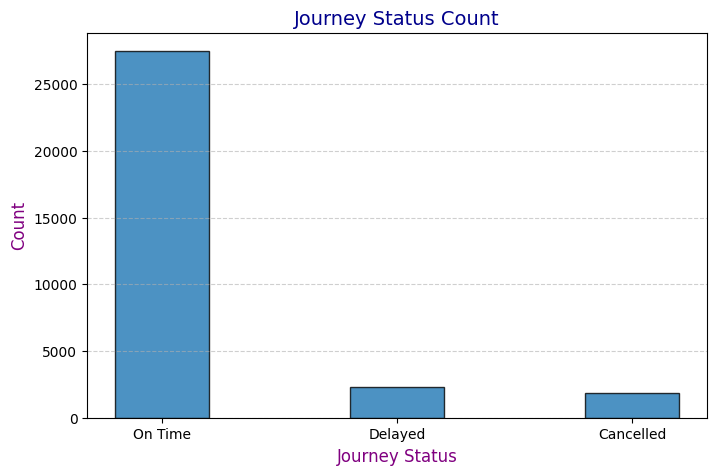

In [6]:
#histogram using price  Frequency column
df.Price
counts, bin_edges, _= plt.hist(df.Price,color="#467fc8", edgecolor="black", alpha=0.7, label="Hist")
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.plot(bin_centers, counts,marker='o', linestyle='-', color="red", markersize=6, label="Price Trend")
plt.xticks(np.arange(0,250,20).tolist())
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#Visualize the count of each "Journey Status" using a simple bar graph.
journey_counts = df["Journey Status"].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(journey_counts.index, journey_counts.values, edgecolor="black", alpha=0.8, width=0.4)

plt.title("Journey Status Count", fontsize=14, color="darkblue")
plt.xlabel("Journey Status", fontsize=12, color="purple")
plt.ylabel("Count", fontsize=12, color="purple")
plt.xticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


 

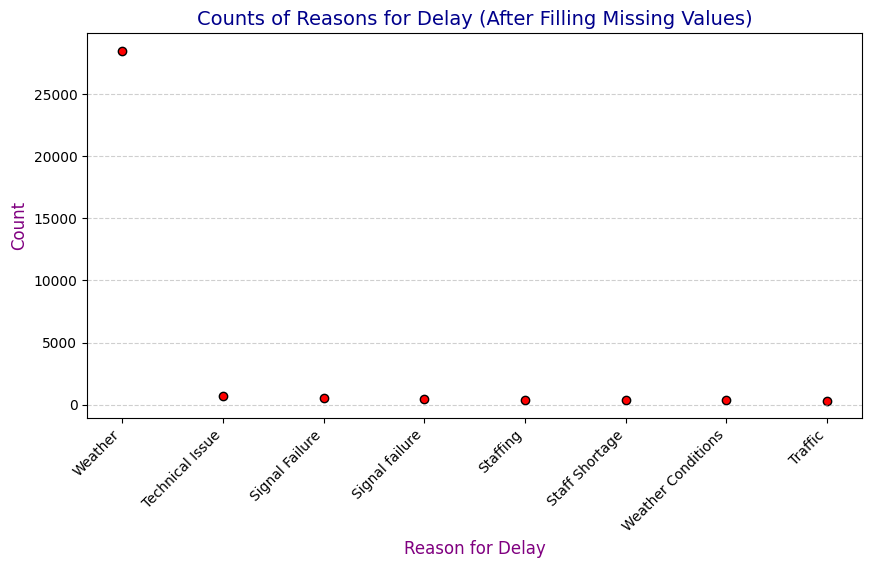

In [33]:
#Fill missing values in the "Reason for Delay" column using the most frequent reason (mode) and visualize the distribution using a scatter plot.



plt.figure(figsize=(10, 5))
plt.scatter(delay_counts.index, delay_counts.values, color="red", edgecolor="black")
plt.title("Counts of Reasons for Delay (After Filling Missing Values)", fontsize=14, color="darkblue")
plt.xlabel("Reason for Delay", fontsize=12, color="purple")
plt.ylabel("Count", fontsize=12, color="purple")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()






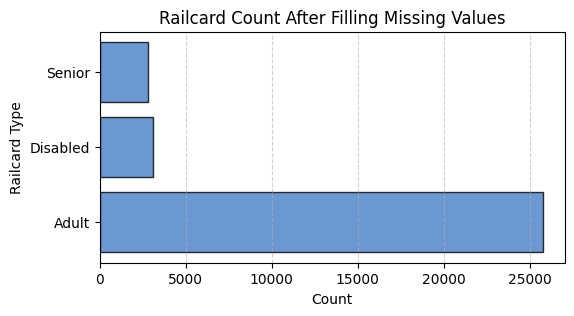

In [17]:
#Clean the "Railcard" column by filling missing values with the most frequent Railcard type (mode) and visualize its distribution using graphs.


df["Railcard"] = df["Railcard"].fillna(df["Railcard"].mode()[0])
railcard_counts = df["Railcard"].value_counts()

#horizontal bar graph
plt.figure(figsize=(6, 3))
plt.barh(railcard_counts.index, railcard_counts.values, color="#467fc8", edgecolor="black", alpha=0.8)
plt.xlabel("Count")
plt.ylabel("Railcard Type")
plt.title("Railcard Count After Filling Missing Values")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()






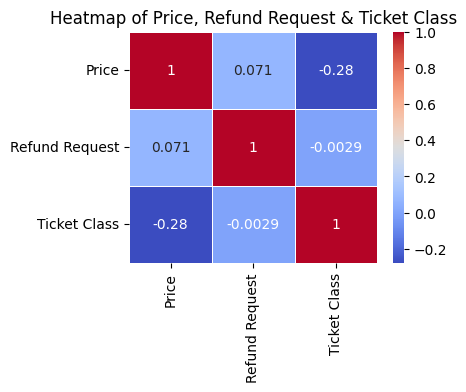

In [20]:
#analyze the correlation between Price, Refund Request, and Ticket Class to understand how ticket pricing impacts refund requests and different ticket classes.
final_df = pd.read_csv("final_data.csv")

final_df["Refund Request"] = final_df["Refund Request"].map({"Yes": 1, "No": 0})
final_df["Ticket Class"] = final_df["Ticket Class"].astype("category").cat.codes

numeric_cols = final_df[["Price", "Refund Request", "Ticket Class"]]

plt.figure(figsize=(4, 3))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Price, Refund Request & Ticket Class")
plt.show()



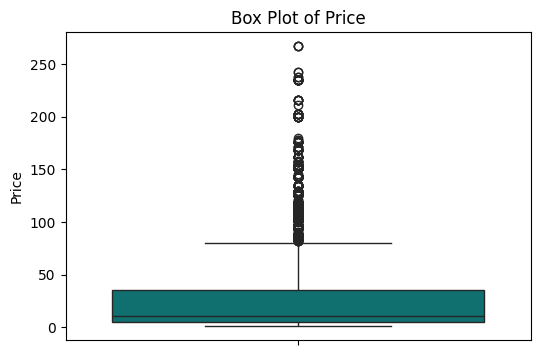

In [19]:
#Boxplot on the basis of price to check their is outlet or not

plt.figure(figsize=(6, 4))
sns.boxplot(y=final_df["Price"], color="teal")
plt.title("Box Plot of Price")
plt.ylabel("Price")
plt.show()

In [11]:
# Final Cleaned Data
df.to_csv("final_data.csv", index=False)

print("Cleaned data saved successfully as 'final_data.csv'.")
df.info()






Cleaned data saved successfully as 'final_data.csv'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  object        
 2   Time of Purchase     31653 non-null  object        
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  object        
 12  Departure Time       31653 non-null